<a href="https://colab.research.google.com/github/mimrancomsats/programmingforAI/blob/main/ExploratoryDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table of Contents**
*   Importing Libraries
*   Data Understanding
*   Data Preparation
*   Feature Understanding
*   Converting Categorical Variables
*   Data Imputation

## Import Libraries
Let's import some libraries to get started!

In [580]:
import pandas as pd
import seaborn as sns

In [581]:
#titanic = sns.load_dataset('titanic')
#titanic.to_csv('titanic.csv')

## Data Undestanding

*   Dataframe shape
*   head and tail
*   dtypes
*   describe

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [582]:
train = pd.read_csv('titanic_train.csv')

In [583]:
train.shape

(891, 12)

In [584]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [585]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [586]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [587]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [588]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [589]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

##Data Preparation

*   Dropping irrelevant columns and rows
*   Handling Missing Values
*   Identifying duplicated columns
*   Renaming Columns


Let's begin some exploratory data analysis! We'll start by dropping irrelevant columns

In [590]:
train.drop(['Embarked','Name','Ticket'],axis=1,inplace=True)

In [591]:
train.shape

(891, 9)

In [592]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin'],
      dtype='object')

In [593]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,male,22.0,1,0,7.2500,NaN
1,2,1,1,female,38.0,1,0,71.2833,C85
2,3,1,3,female,26.0,0,0,7.9250,NaN
3,4,1,1,female,35.0,1,0,53.1000,C123
4,5,0,3,male,35.0,0,0,8.0500,NaN


In [594]:
train.isnull()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,True
887,False,False,False,False,False,False,False,False,False
888,False,False,False,False,True,False,False,False,True
889,False,False,False,False,False,False,False,False,False


In [595]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
dtype: int64

We can use seaborn to create a simple heatmap to see where we are missing data!

<Axes: >

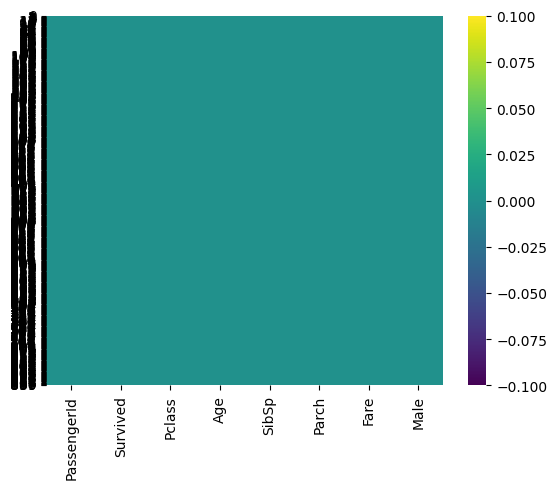

In [651]:
sns.heatmap(train.isnull(),yticklabels=True,cbar=True,cmap='viridis')

In [597]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [598]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [599]:
train.loc[train.duplicated()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin


In [600]:
train.loc[train.duplicated(subset=['Pclass'])]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
2,3,1,3,female,26.0,0,0,7.9250,NaN
3,4,1,1,female,35.0,1,0,53.1000,C123
4,5,0,3,male,35.0,0,0,8.0500,NaN
5,6,0,3,male,NaN,0,0,8.4583,NaN
6,7,0,1,male,54.0,0,0,51.8625,E46
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN
887,888,1,1,female,19.0,0,0,30.0000,B42
888,889,0,3,female,NaN,1,2,23.4500,NaN
889,890,1,1,male,26.0,0,0,30.0000,C148


In [601]:
# Checking an example duplicate
train.query('Age == 1')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
164,165,0,3,male,1.0,4,1,39.6875,NaN
172,173,1,3,female,1.0,1,1,11.1333,NaN
183,184,1,2,male,1.0,2,1,39.0000,F4
381,382,1,3,female,1.0,0,2,15.7417,NaN
386,387,0,3,male,1.0,5,2,46.9000,NaN
788,789,1,3,male,1.0,1,2,20.5750,NaN
827,828,1,2,male,1.0,0,2,37.0042,NaN


<Axes: xlabel='Pclass', ylabel='Age'>

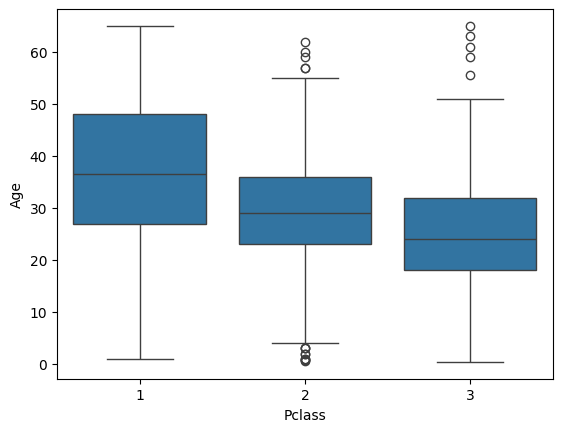

In [653]:
sns.boxplot(y='Age', x='Pclass', data=train)

<Axes: xlabel='Age', ylabel='Count'>

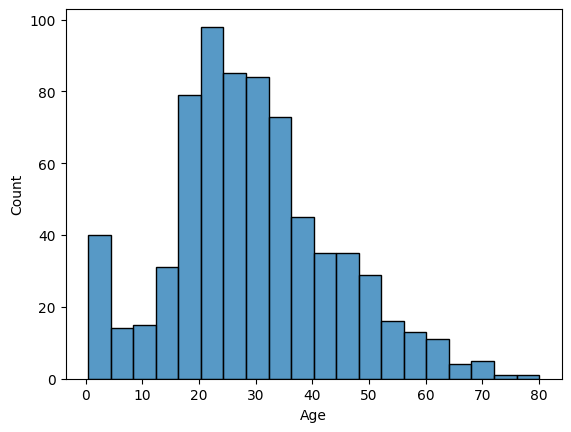

In [603]:
sns.histplot(train['Age'])

In [604]:
##Outlier Remvoval
train['Age'].mean()

29.69911764705882

In [605]:
train.shape

(891, 9)

In [606]:
train[train['Age'] < 66]['Age'].mean()


29.224745042492916

In [607]:
train=train[train['Age'] < 66]

In [608]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,male,22.0,1,0,7.2500,NaN
1,2,1,1,female,38.0,1,0,71.2833,C85
2,3,1,3,female,26.0,0,0,7.9250,NaN
3,4,1,1,female,35.0,1,0,53.1000,C123
4,5,0,3,male,35.0,0,0,8.0500,NaN


In [609]:
train.shape

(706, 9)

<Axes: ylabel='Age'>

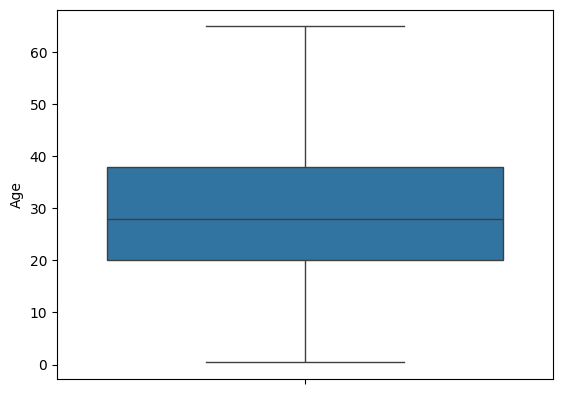

In [610]:
sns.boxplot(y='Age', data=train)

<Axes: xlabel='Age', ylabel='Count'>

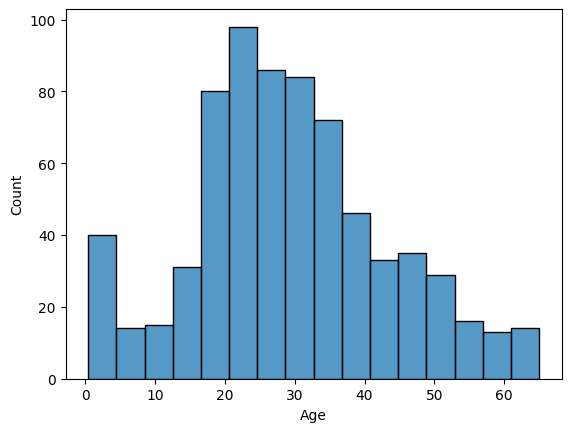

In [611]:
sns.histplot(train['Age'])

Let's check the frequency of survived and not survived people in the dataset.

##Feature Understanding

*   Plotting Feature Distributions

  *   Histogram
  *   Boxplot

<ipython-input-612-8a11688b9f87>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=train,palette='rainbow')


<Axes: xlabel='Survived', ylabel='count'>

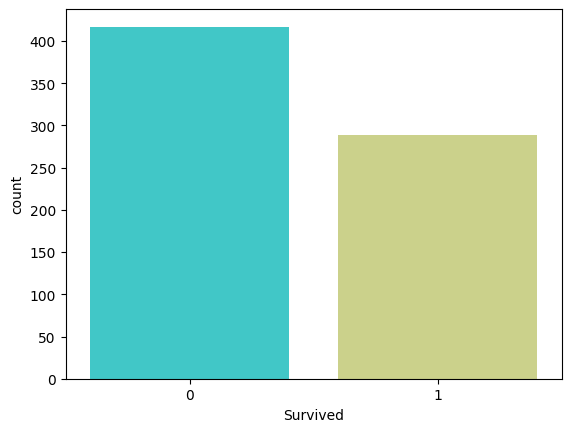

In [612]:
sns.countplot(x='Survived',data=train,palette='rainbow')

<Axes: xlabel='Survived', ylabel='count'>

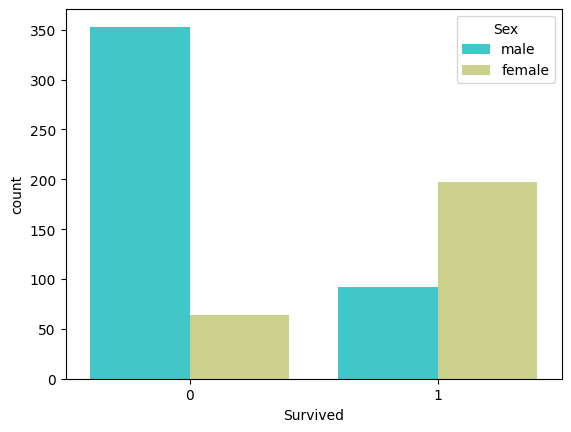

In [613]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='rainbow')

<Axes: xlabel='Survived', ylabel='count'>

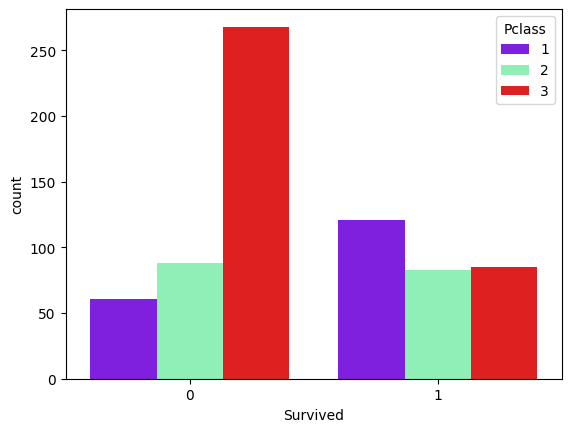

In [614]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

<ipython-input-615-f4a26f01f769>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp',data=train,palette='rainbow')


<Axes: xlabel='SibSp', ylabel='count'>

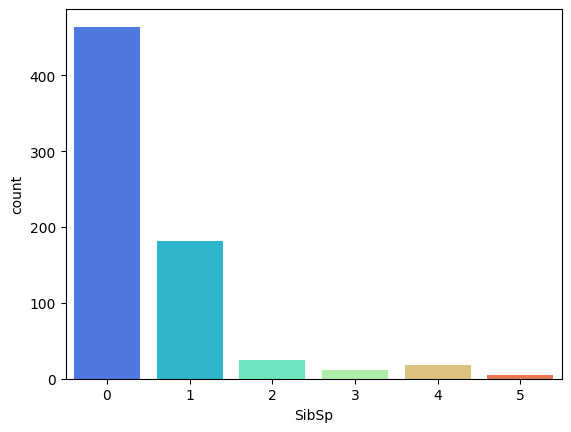

In [615]:
sns.countplot(x='SibSp',data=train,palette='rainbow')

<Axes: >

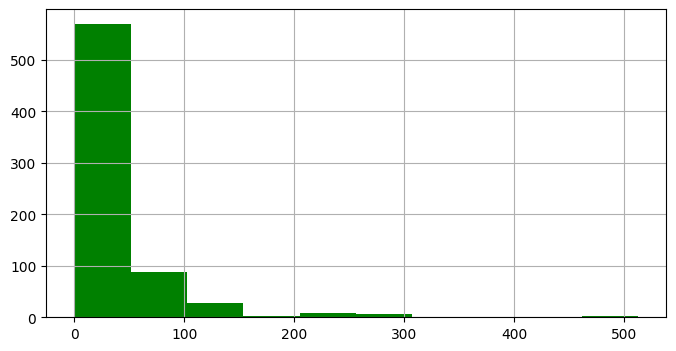

In [616]:
train['Fare'].hist(color='green', figsize=(8,4))

## Data Imputation
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:

In [617]:
#sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')
mean_values = train.groupby('Pclass')['Age'].mean()
print(mean_values)

Pclass
1    37.469341
2    29.431754
3    24.873711
Name: Age, dtype: float64


We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [618]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [619]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

<Axes: >

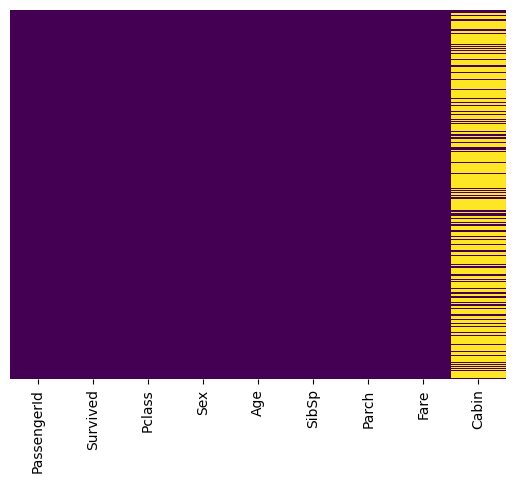

In [620]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [621]:
train.drop('Cabin',axis=1,inplace=True)

In [622]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


<Axes: >

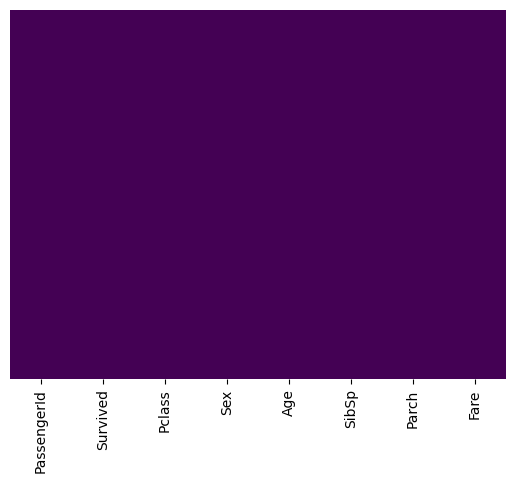

In [623]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [624]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 706 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  706 non-null    int64  
 1   Survived     706 non-null    int64  
 2   Pclass       706 non-null    int64  
 3   Sex          706 non-null    object 
 4   Age          706 non-null    float64
 5   SibSp        706 non-null    int64  
 6   Parch        706 non-null    int64  
 7   Fare         706 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 49.6+ KB


In [625]:
sex = pd.get_dummies(train['Sex'],drop_first=True,dtype=int)

In [626]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [627]:
train = pd.concat([train,sex],axis=1)

In [628]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,male
0,1,0,3,male,22.0,1,0,7.2500,1
1,2,1,1,female,38.0,1,0,71.2833,0
2,3,1,3,female,26.0,0,0,7.9250,0
3,4,1,1,female,35.0,1,0,53.1000,0
4,5,0,3,male,35.0,0,0,8.0500,1


In [629]:
train.drop(['Sex'],axis=1,inplace=True)

In [630]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


In [631]:
train = train.rename(columns={'male':'Male'})

In [632]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Male
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


In [633]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 706 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  706 non-null    int64  
 1   Survived     706 non-null    int64  
 2   Pclass       706 non-null    int64  
 3   Age          706 non-null    float64
 4   SibSp        706 non-null    int64  
 5   Parch        706 non-null    int64  
 6   Fare         706 non-null    float64
 7   Male         706 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 49.6 KB


##Feature Relationships

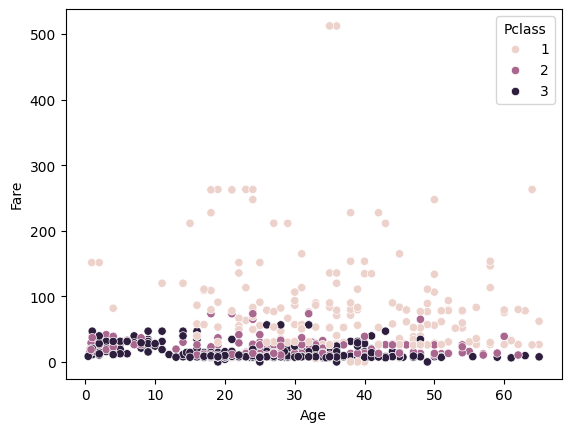

In [634]:
ax = sns.scatterplot(x='Age',
                y='Fare',
                hue='Pclass',
                data=train)

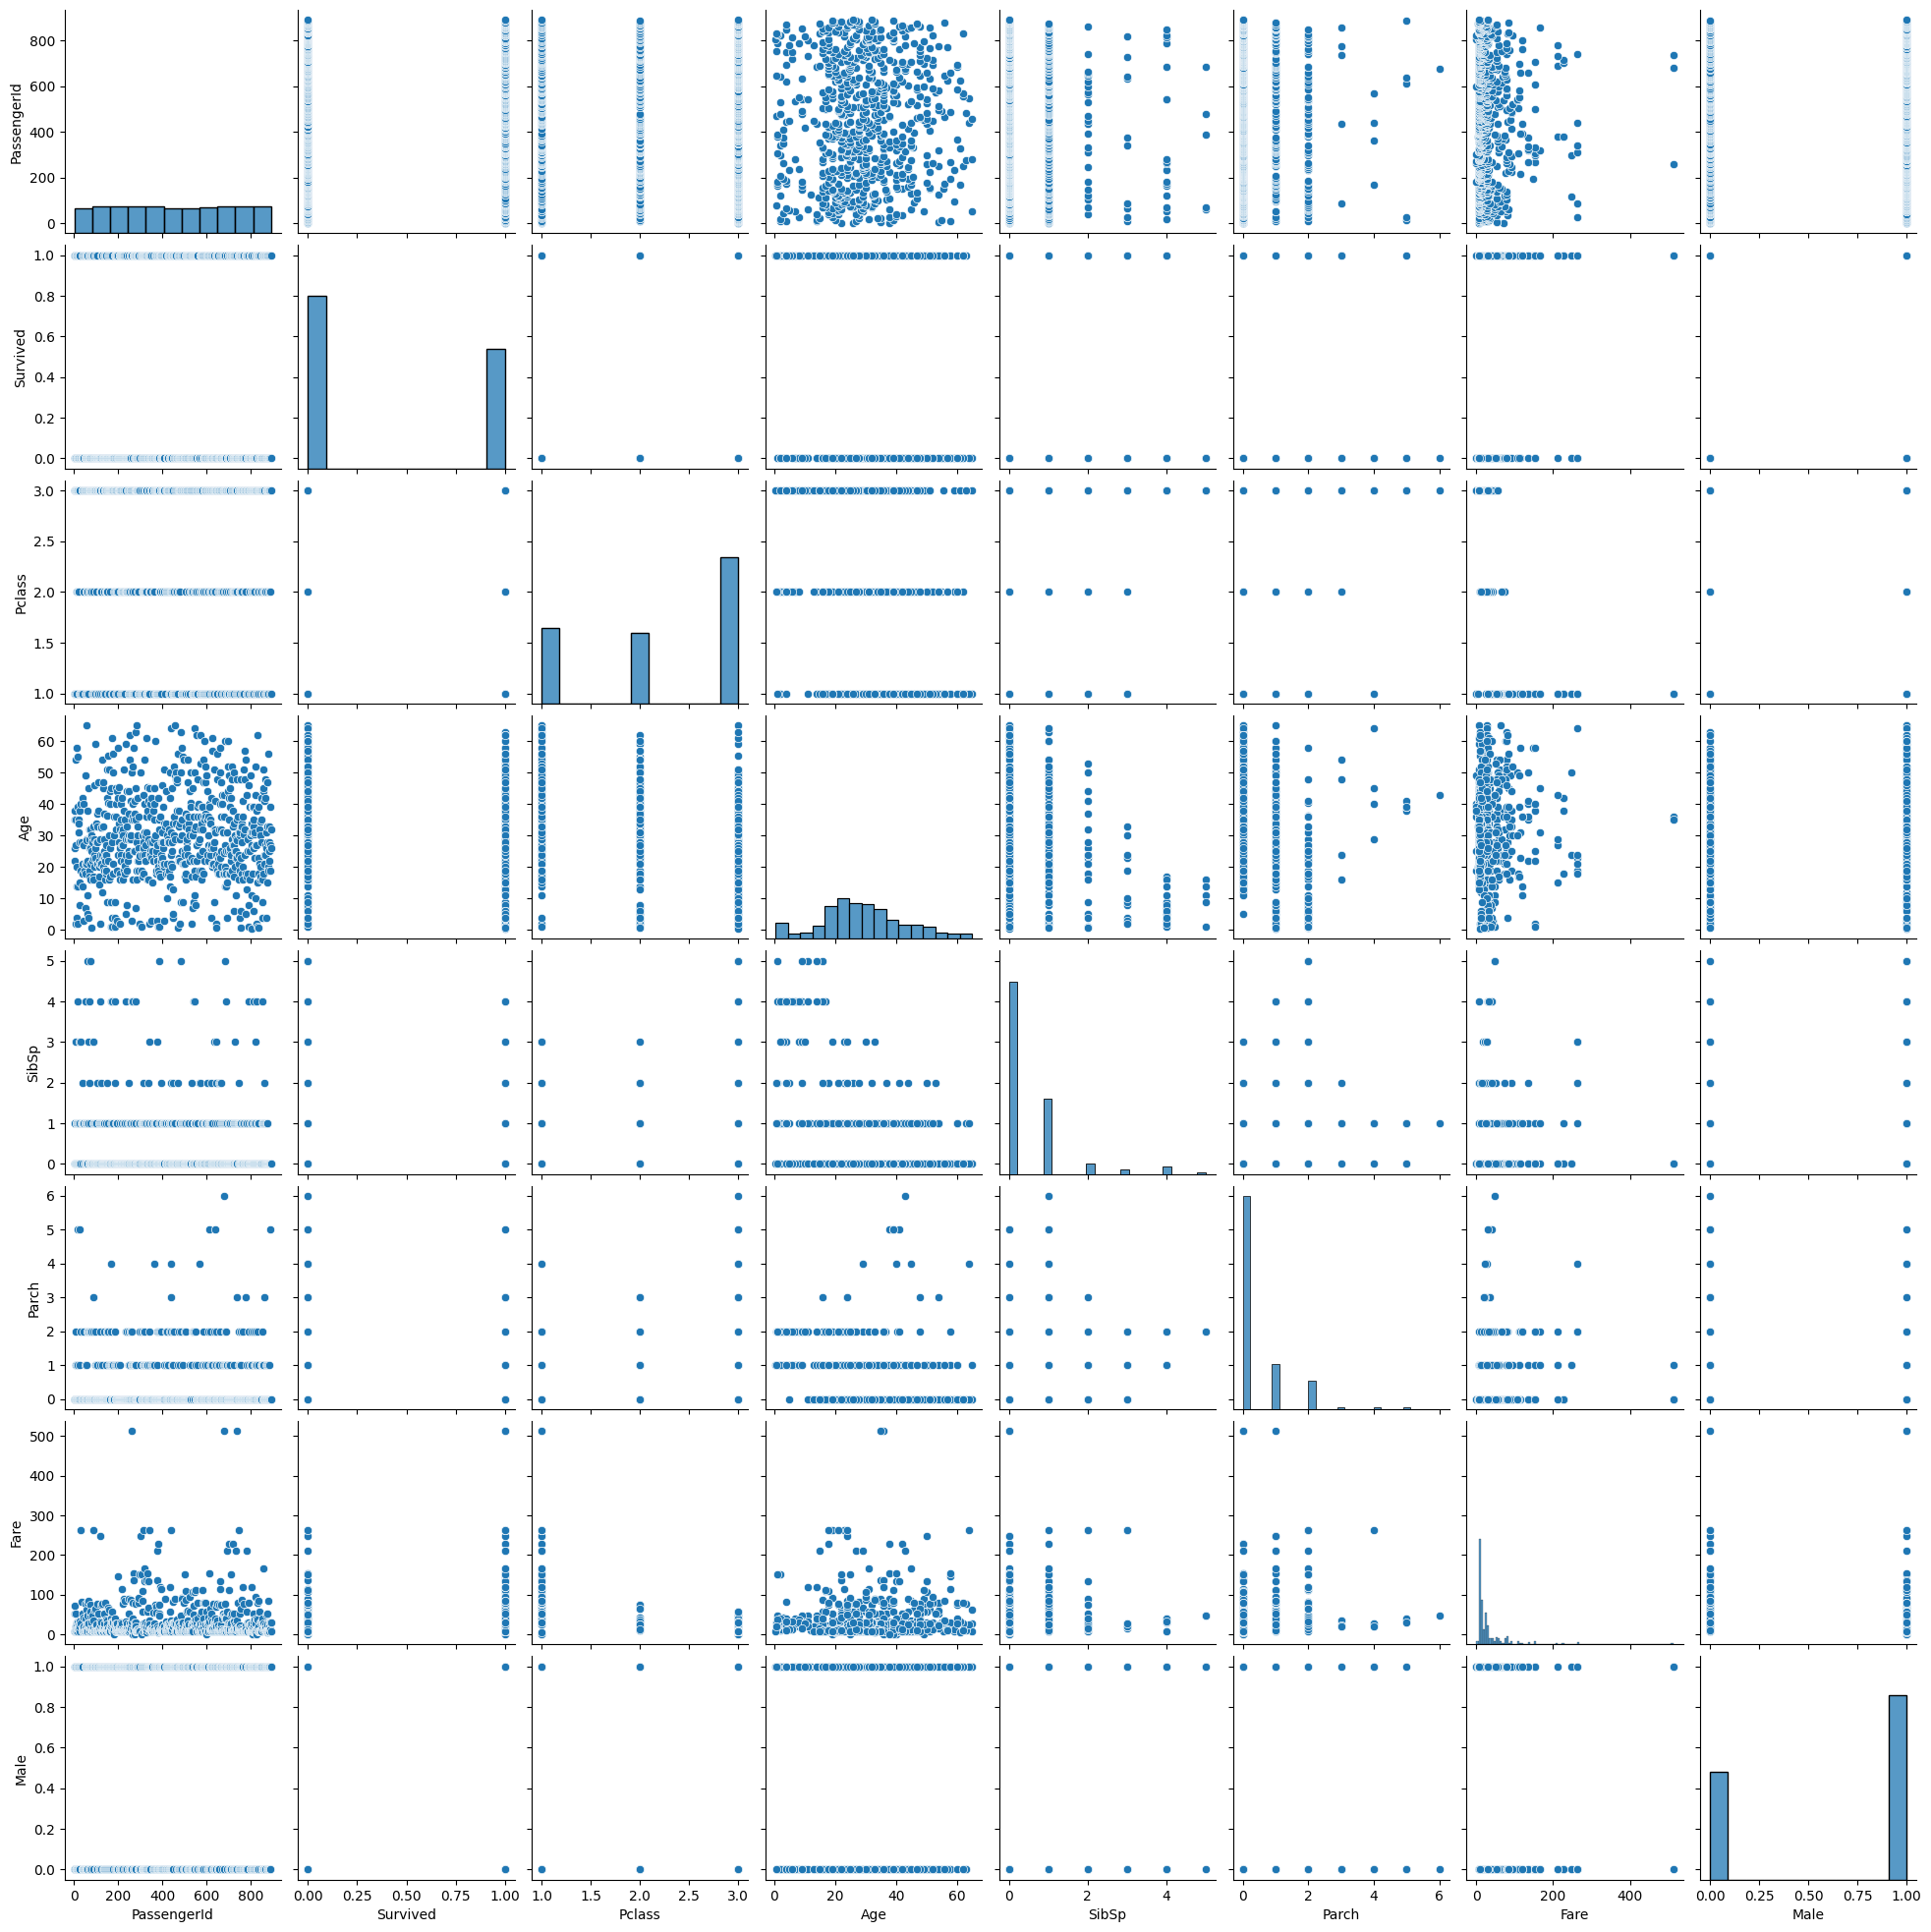

In [635]:
sns.pairplot(train)

In [636]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Male
PassengerId,1.000000,0.027920,-0.035138,0.036321,-0.084765,-0.013477,0.008305,0.024617
Survived,0.027920,1.000000,-0.365179,-0.063530,-0.019802,0.091954,0.268673,-0.538024
Pclass,-0.035138,-0.365179,1.000000,-0.370386,0.066456,0.025013,-0.556152,0.162189
Age,0.036321,-0.063530,-0.370386,1.000000,-0.310048,-0.186564,0.105572,0.072188
SibSp,-0.084765,-0.019802,0.066456,-0.310048,1.000000,0.381823,0.136846,-0.100862
Parch,-0.013477,0.091954,0.025013,-0.186564,0.381823,1.000000,0.203771,-0.245068
Fare,0.008305,0.268673,-0.556152,0.105572,0.136846,0.203771,1.000000,-0.184655
Male,0.024617,-0.538024,0.162189,0.072188,-0.100862,-0.245068,-0.184655,1.000000


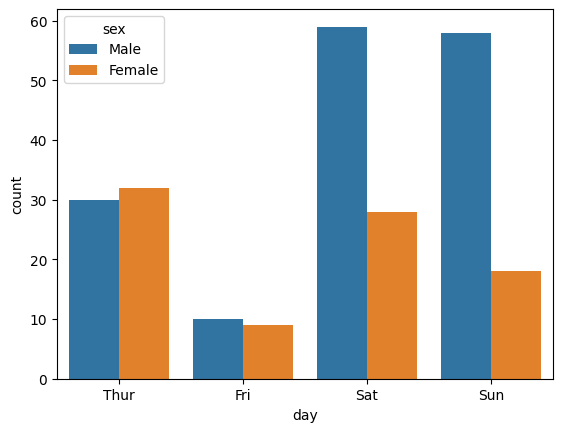

In [637]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load example dataset
tips = sns.load_dataset("tips")

# Create a countplot with hue
sns.countplot(x="day", hue="sex", data=tips)

# Show the plot
plt.show()


In [638]:
!pip install --upgrade pandas

In [639]:
import pandas as pd

# Sample DataFrame (replace with your data)
data = {'category': ['A', 'A', 'B', 'B', 'C', 'C'],
        'size': ['large', 'small', 'medium', 'large', 'medium', 'small']}
df = pd.DataFrame(data)

# One-hot encode the 'category' column (dropping the first level)
dummy_df = pd.get_dummies(df['category'], drop_first=True)

# Add the dummy variables to the original DataFrame (optional)
df = pd.concat([df, dummy_df], axis=1)

print(df)


  category    size      B      C
0        A   large  False  False
1        A   small  False  False
2        B  medium   True  False
3        B   large   True  False
4        C  medium  False   True
5        C   small  False   True


In [640]:
import pandas as pd

# Create a DataFrame with categorical variables
data = {'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red'],
        'Size': ['Small', 'Large', 'Medium', 'Small', 'Medium']}

df = pd.DataFrame(data)

# Convert categorical variables to dummy variables
dummy_df = pd.get_dummies(df)

print(dummy_df)


   Color_Blue  Color_Green  Color_Red  Size_Large  Size_Medium  Size_Small
0       False        False       True       False        False        True
1        True        False      False        True        False       False
2       False         True      False       False         True       False
3        True        False      False       False        False        True
4       False        False       True       False         True       False


[[0.56804456 0.92559664 0.07103606 0.0871293  0.0202184 ]
 [0.83261985 0.77815675 0.87001215 0.97861834 0.79915856]
 [0.46147936 0.78052918 0.11827443 0.63992102 0.14335329]
 [0.94466892 0.52184832 0.41466194 0.26455561 0.77423369]
 [0.45615033 0.56843395 0.0187898  0.6176355  0.61209572]
 [0.616934   0.94374808 0.6818203  0.3595079  0.43703195]]


<Axes: >

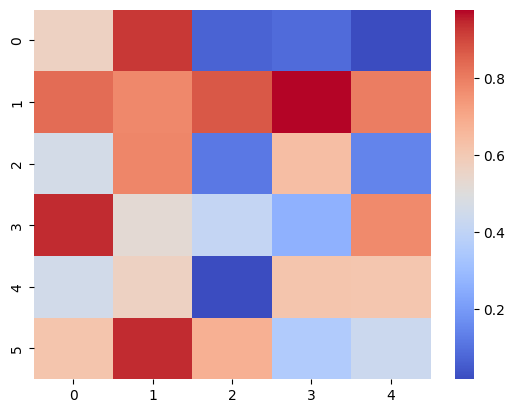

In [641]:
import seaborn as sns
import pandas as pd
import numpy as np  # NumPy for random data generation

# Sample data (replace with your actual data)
data = np.random.rand(6, 5)  # Create a random 6x5 array
print(data)
df = pd.DataFrame(data)

# Create a heatmap using Seaborn
sns.heatmap(df, cmap="coolwarm")  # "coolwarm" is a color palette choice


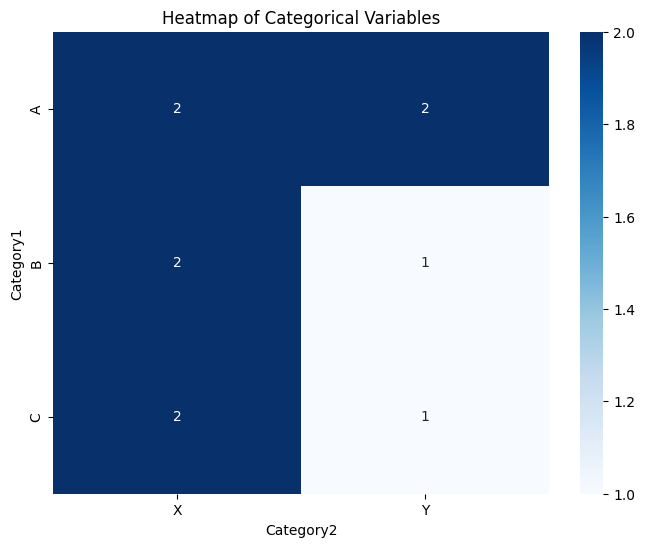

In [642]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace with your dataset)
data = {
    'Category1': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'C', 'B', 'A'],
    'Category2': ['X', 'Y', 'Y', 'X', 'X', 'Y', 'Y', 'X', 'X', 'X']
}

# Create DataFrame
df = pd.DataFrame(data)

# Create cross-tabulation
cross_tab = pd.crosstab(df['Category1'], df['Category2'])

# Generate heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap of Categorical Variables')
plt.xlabel('Category2')
plt.ylabel('Category1')
plt.show()


In [643]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Sample data (replace with your actual data)
data = [[100000, 100], [200000, 500], [800000, 1200], [1000000, 3000]]

# Separate features (price and distance)
prices, distances = zip(*data)

# Min-Max Scaling
scaler = MinMaxScaler(feature_range=(0, 1))  # Scale between 0 and 1
scaled_data = scaler.fit_transform([[p, d] for p, d in zip(prices, distances)])

# Normalization (Standardization)
standardizer = StandardScaler()
normalized_data = standardizer.fit_transform([[p, d] for p, d in zip(prices, distances)])

# Print original data, scaled data, and normalized data
print("Original Data:")
for p, d in data:
  print(f"Price: ${p:,}, Distance: {d} meters")

print("\nScaled Data:")
for p, d in scaled_data:
  print(f"Scaled Price: {p:.2f}, Scaled Distance: {d:.2f}")

print("\nNormalized Data:")
for p, d in normalized_data:
  print(f"Normalized Price: {p:.2f}, Normalized Distance: {d:.2f}")


Original Data:
Price: $100,000, Distance: 100 meters
Price: $200,000, Distance: 500 meters
Price: $800,000, Distance: 1200 meters
Price: $1,000,000, Distance: 3000 meters

Scaled Data:
Scaled Price: 0.00, Scaled Distance: 0.00
Scaled Price: 0.11, Scaled Distance: 0.14
Scaled Price: 0.78, Scaled Distance: 0.38
Scaled Price: 1.00, Scaled Distance: 1.00

Normalized Data:
Normalized Price: -1.11, Normalized Distance: -0.99
Normalized Price: -0.85, Normalized Distance: -0.63
Normalized Price: 0.72, Normalized Distance: 0.00
Normalized Price: 1.24, Normalized Distance: 1.62


In [644]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Sample data
data = pd.DataFrame({
    'A': np.random.randint(0, 100, 100),
    'B': np.random.randint(0, 1000, 100),
})

# Scaling
# Min-max scaling
scaler_minmax = MinMaxScaler()
scaled_minmax = scaler_minmax.fit_transform(data)

# Standardization (Z-score normalization)
scaler_standard = StandardScaler()
scaled_standard = scaler_standard.fit_transform(data)

# Display scaled data
scaled_data_minmax = pd.DataFrame(scaled_minmax, columns=data.columns)
scaled_data_standard = pd.DataFrame(scaled_standard, columns=data.columns)

print("Min-max scaled data:")
print(scaled_data_minmax.head())

print("\nStandardized data (Z-score normalization):")
print(scaled_data_standard.head())


Min-max scaled data:
          A         B
0  0.656566  0.875380
1  0.414141  0.261398
2  0.575758  0.880446
3  0.353535  0.288754
4  0.111111  0.321175

Standardized data (Z-score normalization):
          A         B
0  0.551085  1.253192
1 -0.257353 -0.830076
2  0.281606  1.270381
3 -0.459462 -0.737257
4 -1.267900 -0.627249


     Values
0  1.764052
1  0.400157
2  0.978738
3  2.240893
4  1.867558
5 -0.977278
6  0.950088
7 -0.151357
8 -0.103219
9  0.410599


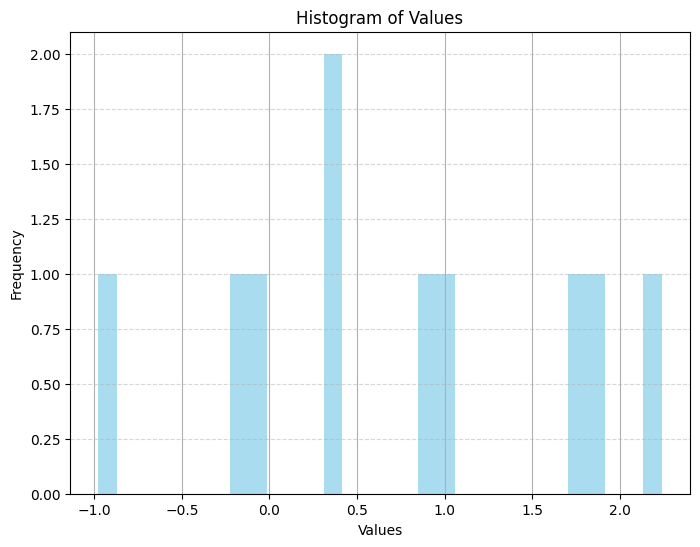

In [645]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a sample DataFrame with random numerical data
np.random.seed(0)
data = pd.DataFrame({
    'Values': np.random.randn(10)  # Generate 1000 random samples from a standard normal distribution
})

print(data)

# Plot the histogram
plt.figure(figsize=(8, 6))  # Set the figure size
data['Values'].hist(bins=30, color='skyblue', alpha=0.7)  # Plot histogram with 30 bins, skyblue color, and 70% transparency
plt.title('Histogram of Values')  # Set the title of the plot
plt.xlabel('Values')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add grid lines to the y-axis with dashed lines and 50% transparency
plt.show()  # Display the plot


[0.79587451 1.25593076 0.92322315 0.78720115 0.55104849 1.03815929
 0.5755192  2.22352441 3.31491218 0.4836021 ]


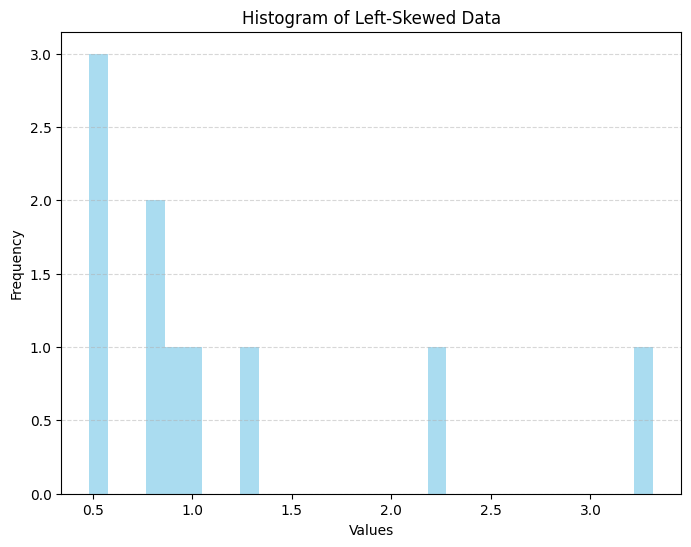

[-0.22831376  0.22787694 -0.07988431 -0.23927147 -0.59593247  0.03744924
 -0.55248269  0.79909351  1.19843113 -0.72649282]


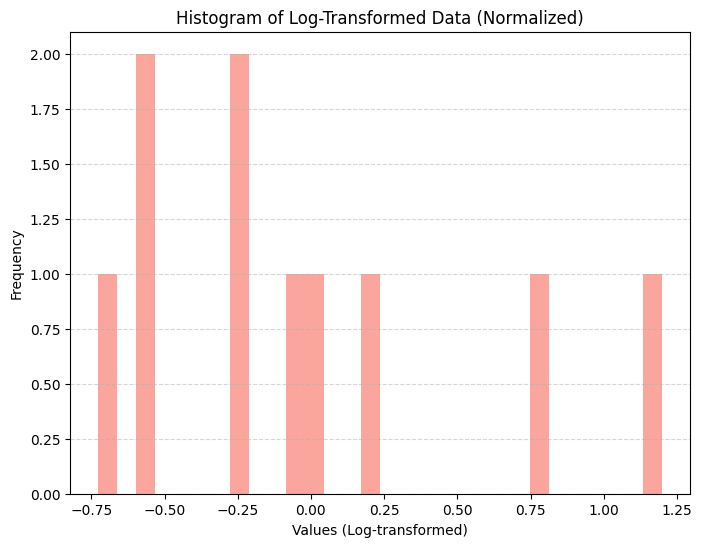

In [646]:
import numpy as np
import matplotlib.pyplot as plt

# Generate left-skewed data
np.random.seed(0)
left_skewed_data = np.random.exponential(scale=1, size=10)  # Exponential distribution to create left-skewed data
print(left_skewed_data)

# Plot histogram of left-skewed data
plt.figure(figsize=(8, 6))
plt.hist(left_skewed_data, bins=30, color='skyblue', alpha=0.7)
plt.title('Histogram of Left-Skewed Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Apply log transformation to normalize the data
log_transformed_data = np.log(left_skewed_data)
print(log_transformed_data)

# Plot histogram of log-transformed data
plt.figure(figsize=(8, 6))
plt.hist(log_transformed_data, bins=30, color='salmon', alpha=0.7)
plt.title('Histogram of Log-Transformed Data (Normalized)')
plt.xlabel('Values (Log-transformed)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357]
0.41059850193837233
[-0.977277879876411, -0.1513572082976979, -0.10321885179355784, 0.144043571160878, 0.4001572083672233, 0.41059850193837233, 0.9500884175255894, 0.9787379841057392, 1.764052345967664, 1.8675579901499675, 2.240893199201458]


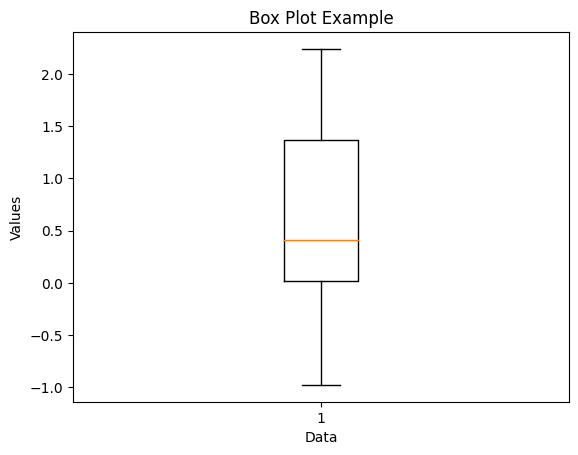

In [647]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=11)
print(data)
print(np.median(data))
sorted_data = sorted(data)
print(sorted_data)

# Create a box plot
plt.boxplot(data)

# Add title and labels
plt.title('Box Plot Example')
plt.xlabel('Data')
plt.ylabel('Values')

# Show the plot
plt.show()


In [648]:
import numpy as np

# Sample dataset
data = [1.76405235,  0.40015721,  0.97873798,  2.2408932,   1.86755799, -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985]

sorted_data = sorted(data)

# Calculate the median
n = len(sorted_data)
print(sorted_data)

# Calculate median using NumPy
median = np.median(data)
print("Median (NumPy):", median)


[-0.97727788, -0.15135721, -0.10321885, 0.40015721, 0.4105985, 0.95008842, 0.97873798, 1.76405235, 1.86755799, 2.2408932]
Median (NumPy): 0.68034346


In [649]:
import pandas as pd

# Sample DataFrame
data = {'A': [1, 2, 3, 1, 2],
        'B': ['x', 'y', 'z', 'x', 'y']}
df = pd.DataFrame(data)

# Identify duplicate rows
duplicates = df.loc[df.duplicated()]

print(duplicates)


   A  B
3  1  x
4  2  y


In [650]:
import pandas as pd

# Sample DataFrame
data = {'A': [1, 2, 3, 4, 5],
        'B': ['a', 'b', 'c', 'd', 'e']}
df = pd.DataFrame(data, index=['row1', 'row2', 'row3', 'row4', 'row5'])

# Create a boolean array based on a condition
boolean_array = df['A'] > 3
print(boolean_array)
# Output:
# row1    False
# row2    False
# row3    False
# row4     True
# row5     True
# Name: A, dtype: bool

# Use the boolean array to select rows
selected_rows = df.loc[boolean_array]
print(selected_rows)
# Output:
#       A  B
# row4  4  d
# row5  5  e


row1    False
row2    False
row3    False
row4     True
row5     True
Name: A, dtype: bool
      A  B
row4  4  d
row5  5  e
